Librerias a utilizar

In [311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

Abrimos nuestros CSV

In [312]:
df_test = pd.read_csv('bike_test.csv')
df_train = pd.read_csv('bike_train.csv')

Analizamos si tenemos nulos, los tipos de datos por columna para tenerlos en el formato necesario y una vista general de los datos

In [313]:
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     11999 non-null  int64  
 1   dteday      11999 non-null  object 
 2   season      11999 non-null  int64  
 3   yr          11999 non-null  int64  
 4   mnth        11999 non-null  int64  
 5   hr          11999 non-null  int64  
 6   holiday     11999 non-null  int64  
 7   weekday     11999 non-null  int64  
 8   workingday  11999 non-null  int64  
 9   weathersit  11999 non-null  int64  
 10  temp        11999 non-null  float64
 11  atemp       11999 non-null  float64
 12  hum         11999 non-null  float64
 13  windspeed   11999 non-null  float64
 14  casual      11999 non-null  int64  
 15  registered  11999 non-null  int64  
 16  cnt         11999 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 1.6+ MB


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01/01/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01/01/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01/01/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01/01/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [314]:
df_test.info()
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5380 entries, 0 to 5379
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     5380 non-null   int64  
 1   dteday      5380 non-null   object 
 2   season      5380 non-null   int64  
 3   yr          5380 non-null   int64  
 4   mnth        5380 non-null   int64  
 5   hr          5380 non-null   int64  
 6   holiday     5380 non-null   int64  
 7   weekday     5380 non-null   int64  
 8   workingday  5380 non-null   int64  
 9   weathersit  5380 non-null   int64  
 10  temp        5380 non-null   float64
 11  atemp       5380 non-null   float64
 12  hum         5380 non-null   float64
 13  windspeed   5380 non-null   float64
dtypes: float64(4), int64(9), object(1)
memory usage: 588.6+ KB


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,12000,20/05/2012,2,1,5,4,0,0,0,1,0.52,0.5000,0.68,0.0896
1,12001,20/05/2012,2,1,5,5,0,0,0,1,0.50,0.4848,0.72,0.1045
2,12002,20/05/2012,2,1,5,6,0,0,0,1,0.50,0.4848,0.63,0.1343
3,12003,20/05/2012,2,1,5,7,0,0,0,1,0.52,0.5000,0.68,0.1940
4,12004,20/05/2012,2,1,5,8,0,0,0,1,0.56,0.5303,0.56,0.1642


In [315]:
#df_train.head(10)
df_train.tail(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
11989,11990,19/05/2012,2,1,5,18,0,6,0,1,0.74,0.6515,0.33,0.0896,254,391,645
11990,11991,19/05/2012,2,1,5,19,0,6,0,1,0.70,0.6364,0.39,0.1343,203,229,432
11991,11992,19/05/2012,2,1,5,20,0,6,0,1,0.68,0.6364,0.41,0.0896,118,197,315
11992,11993,19/05/2012,2,1,5,21,0,6,0,1,0.64,0.6212,0.50,0.0000,81,178,259
11993,11994,19/05/2012,2,1,5,22,0,6,0,1,0.64,0.6212,0.47,0.0000,104,234,338
11994,11995,19/05/2012,2,1,5,23,0,6,0,1,0.60,0.6212,0.56,0.1642,71,168,239
11995,11996,20/05/2012,2,1,5,0,0,0,0,1,0.58,0.5455,0.53,0.1045,42,128,170
11996,11997,20/05/2012,2,1,5,1,0,0,0,1,0.56,0.5303,0.52,0.0000,28,102,130
11997,11998,20/05/2012,2,1,5,2,0,0,0,1,0.56,0.5303,0.52,0.0000,36,62,98
11998,11999,20/05/2012,2,1,5,3,0,0,0,1,0.54,0.5152,0.56,0.0896,26,40,66


In [316]:
#df_train['dteday']=pd.to_datetime(df_train['dteday'])
#df_train=df_train.sort_values('dteday')

In [317]:
df_train.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000
mean,6000.000000,2.210684,0.279523,5.530294,11.556630,0.027752,3.009334,0.684057,1.435036,0.465704,0.448888,0.625770,0.196433,30.049837,128.545129,158.594966
std,3463.957275,1.088798,0.448784,3.433005,6.911891,0.164269,2.005264,0.464910,0.650894,0.188576,0.169633,0.200637,0.125394,43.596915,124.692750,151.392952
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3000.500000,1.000000,0.000000,3.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.320000,0.303000,0.470000,0.104500,3.000000,29.000000,34.000000
50%,6000.000000,2.000000,0.000000,5.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.460000,0.454500,0.620000,0.194000,13.000000,98.000000,118.000000
75%,8999.500000,3.000000,1.000000,8.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.620000,0.590900,0.790000,0.283600,39.000000,185.000000,232.000000
max,11999.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,0.960000,1.000000,1.000000,0.850700,367.000000,770.000000,957.000000


Realizamos una Matriz de correlación para ver como se relacionan y tomar las que mas peso tengan

C:\Users\Alfredo BTP\AppData\Local\Temp\ipykernel_39088\4169601441.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


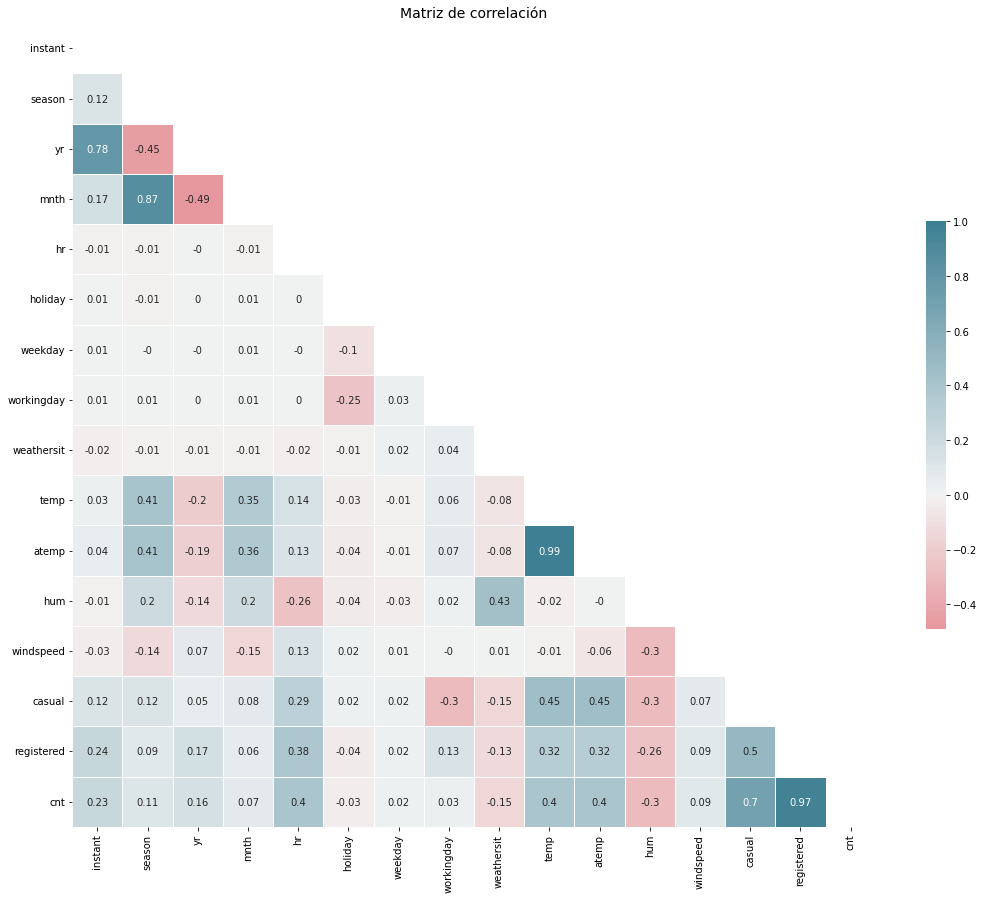

In [318]:
corr = df_train.corr().round(2)   
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(18, 15))
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title("Matriz de correlación", fontsize=14)
plt.show()

Podemos notar que "registered" y "casual" son los que estan mas fuertemente correlacionados, que tiene sentido ya que son la cantidad de personas que se registran para rentar así que directamente el número de bicicletas rentadas depende de estas dos, pero no podran ser utilizadas ya que en los datos de Test no contamos con estas columnas. Tambien podemos notar que columnas como "temp" "atemp" tienen una correlación medianamente fuerte, aunque sería un poco redundante usar ambas.

Dropeamos la columna instant ya que es un ID que no afecta a nuestra variable meta "cnt" y las columnas "casual" y "registrered", ya que no contamos con ellas en nuestros datos de Test.

In [319]:
df_train.drop(['instant', 'casual', 'registered'], axis=1, inplace=True)

Realizamos histogramas para ver como distribuye cada variable y decidir con cuales trabajaremos.

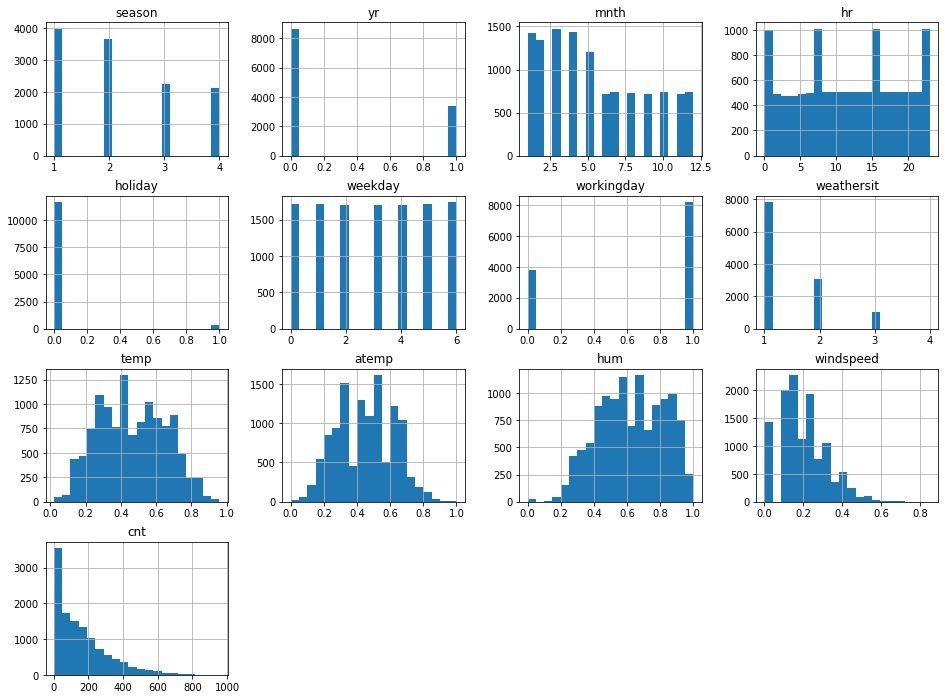

In [320]:
df_train.hist(bins= 20,figsize=(16,12))
plt.show()

Notamos como las variables de tiempo(Fecha y mes) se ven divididas por las estaciones del año, tambien podemo ver como afecta que es día de trabajo, sin embargo los días de la semana tienen una distribución muy similar, aunque notamos un patron en la hora de renta de las bicicletas. Por lo tanto podemos ver que las variables mas influyentes estan relacionadas con el clima, lo cual tiene sentido ya que es mas probable que en una temporada de primavera alguien ande en bicicleta vs una temporada de invierno con nieve.
Tambien vemos que la distribución de nuestro variable objetivo "cnt" distribuye de forma exponencial, lo que nos quiere decir que hay muchos días de pocas rentas y pocos días de muchas rentas.

In [386]:
#mask =['mnth','hr','atemp','hum','workingday','windspeed']
mask=	['hr', 'workingday','temp','hum','windspeed','atemp','mnth','weathersit','season','weekday']
df_prueba = df_train[mask]
#Descartadas [dteday,yr,holiday,weekday]'season','weathersit',,'season','weekday''weekday','temp'

In [322]:
df_test

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,12000,20/05/2012,2,1,5,4,0,0,0,1,0.52,0.5000,0.68,0.0896
1,12001,20/05/2012,2,1,5,5,0,0,0,1,0.50,0.4848,0.72,0.1045
2,12002,20/05/2012,2,1,5,6,0,0,0,1,0.50,0.4848,0.63,0.1343
3,12003,20/05/2012,2,1,5,7,0,0,0,1,0.52,0.5000,0.68,0.1940
4,12004,20/05/2012,2,1,5,8,0,0,0,1,0.56,0.5303,0.56,0.1642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,17375,31/12/2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642
5376,17376,31/12/2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642
5377,17377,31/12/2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642
5378,17378,31/12/2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343


In [323]:
df_prueba

,hr,workingday,temp,hum,windspeed,atemp,mnth,weathersit,season,weekday
0,0,0,0.24,0.81,0.0000,0.2879,1,1,1,6
1,1,0,0.22,0.80,0.0000,0.2727,1,1,1,6
2,2,0,0.22,0.80,0.0000,0.2727,1,1,1,6
3,3,0,0.24,0.75,0.0000,0.2879,1,1,1,6
4,4,0,0.24,0.75,0.0000,0.2879,1,1,1,6
...,...,...,...,...,...,...,...,...,...,...
11994,23,0,0.60,0.56,0.1642,0.6212,5,1,2,6
11995,0,0,0.58,0.53,0.1045,0.5455,5,1,2,0
11996,1,0,0.56,0.52,0.0000,0.5303,5,1,2,0
11997,2,0,0.56,0.52,0.0000,0.5303,5,1,2,0


Previamente quitamos las columnas que no consideraremos para nuestra predicción, procedemos a definir "X" y "y" y separamos nuestros datos de entrenamiento y prueba

In [387]:
X =df_prueba
y= df_train['cnt']

In [388]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

Iremos probando modelos para ver cual se adapta mas a nuestro problema, comenzaremos con el mas simple que sería una regresión lineal multiple.

La regresión lineal multiple es la mas básica pero no es la mejor para este caso ya que los valores se encuentran muy dispersos.

In [326]:
model_reg =LinearRegression()

In [327]:
model_reg.fit(X_train,y_train)
y_pred =model_reg.predict(X_test) 

In [328]:
model_reg.score(X_train,y_train)

0.32331758671718913

Como podemos observar tiene un alto MSE

In [329]:
MSE (y_test,y_pred, squared=False)

121.91453716731951

Ahora probaremos Random Forest

In [373]:
rf_train = RandomForestRegressor(bootstrap=True, criterion= 'mse',max_depth=None, max_features=1.0, max_leaf_nodes=None,min_impurity_decrease=0.0, min_samples_leaf= 1, min_samples_split=2, min_weight_fraction_leaf=0.0 )

In [331]:
rf_train.fit(X_train,y_train)
y_pred2 = rf_train.predict(X_test)
rmse_test = MSE(y_test, y_pred2, squared=False)
print( rmse_test)

c:\Users\Alfredo BTP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


52.296109989510725


Probamos tambien XGboost

In [383]:
#rf_train= xgb.XGBRegressor(objective='reg:linear', n_estimators= 10,seed = 123)
rf_train  = xgb.XGBRegressor(max_depth=7, min_child_weight=6, learning_rate=0.173, objective='reg:squarederror')


In [333]:
def custom_rmse(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred[ y_pred < 0 ] = 0

    return np.sqrt(MSE(y_test, y_pred))

In [390]:
max_depth = np.arange(5,12)
min_child_weight = np.arange(1,11)
learning_rate = np.linspace(0.01,0.5,7)
n_estimators= np.arange(1,10)

max_score = 60

for d in max_depth:
    for c in min_child_weight:
        for l in learning_rate:

            model_xgboost = xgb.XGBRegressor(max_depth=d, min_child_weight=c, learning_rate=l, objective='reg:squarederror')
            scores = cross_val_score(model_xgboost, X_train, y_train, cv=5, scoring=custom_rmse)
            
            new_score = np.mean(scores)
            if new_score < max_score:
                max_score = new_score
                print(d, c, l, new_score)


5 1 0.09166666666666666 55.211260717454294
5 1 0.17333333333333334 53.45692352470621
5 1 0.255 52.47088427830636
5 2 0.255 52.2392079911217
6 1 0.17333333333333334 51.59906626645761
6 10 0.17333333333333334 51.54592442540259
7 1 0.17333333333333334 51.23797225944304
7 6 0.17333333333333334 51.227865870929975


KeyboardInterrupt: 

In [385]:
rf_train.fit(X_train,y_train)
y_pred2 = rf_train.predict(X_test)
rmse_test = MSE(y_test, y_pred2, squared=False)
print( rmse_test)

50.570955827216366


Por ultimo, usamos Gradientboosting que por la forma en que funcion donde va creando arboles que "aprenden" de los resultados de arboles anteriores nos ayuda a lograr una mejor adaptación a los datos.

In [336]:
rf_train = GradientBoostingRegressor( learning_rate= 0.036087332404571744,loss= 'squared_error', max_depth= None, max_leaf_nodes= 64,
                                      min_samples_leaf= 3, tol= 1e-07,n_iter_no_change= 18)


In [391]:
min_samples_leaf= np.arange(1,6)
n_iter_no_change = np.arange(1,30,2)
learning_rate = np.linspace(0.05,0.5,7)
#n_estimators= np.arange(0,10)

max_score = 60
for m in min_samples_leaf:
    #for d in max_depth:
        for n in n_iter_no_change:
            for l in learning_rate:

                model_gradient = GradientBoostingRegressor(loss='squared_error',learning_rate=l,criterion='friedman_mse',
                                                           min_samples_leaf=m,n_iter_no_change=n, tol= 1e-07,max_leaf_nodes= 64)
                scores = cross_val_score(model_gradient, X_train, y_train, cv=5, scoring=custom_rmse)
                
                new_score = np.mean(scores)
                if new_score < max_score:
                    max_score = new_score
                    print(m, d, n, l, new_score)

1 10 3 0.5 59.56299779705866
1 10 5 0.27499999999999997 59.235290097186336
1 10 7 0.35 58.55961992817809
1 10 7 0.425 58.13964856049313
1 10 11 0.425 57.74553790080496
1 10 11 0.5 57.60008635108649
1 10 15 0.5 57.37326521087512


In [337]:
rf_train.fit(X_train,y_train)
y_pred2 = rf_train.predict(X_test)

In [338]:
rmse_test = MSE(y_test, y_pred2, squared=False)
print( rmse_test)

52.57731077714037


Vemos la importancia de cada una de las variables para la toma de decision del valor meta, así tambien me apoye para incluir y descartar otras features

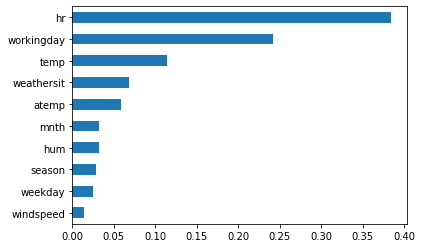

In [369]:
importantes = pd.Series(rf_train.feature_importances_,index= X.columns)
sorted_impor = importantes.sort_values()
sorted_impor.plot(kind='barh')
plt.show()

Aplicamos filtro al dataset de test y usamos el modelo entrenado anteriormente con los datos correspondientes

In [340]:
x_test_f = df_test[mask]

In [348]:
rf_train.fit(X,y)
y_predf = rf_train.predict(x_test_f)
score = rf_train.score(X,y)
print(score)

0.9303818037046038


Convertimos nuestro resultado a DF y despues a csv sin index para cumplir con el formato requerido.

In [342]:
data = pd.DataFrame(y_predf, columns=['pred'])

In [343]:
data

,pred
0,18.142728
1,17.293892
2,20.928769
3,59.664897
4,137.635988
...,...
5375,119.460264
5376,79.054231
5377,64.012137
5378,50.884363


In [344]:
data.to_csv('AlfredoBTP.csv',index=False)